In [18]:
from plot_T2output import *
import os


old_path = os.getcwd()




In [19]:
os.chdir(old_path)
path = '/scratch/SCS/gpb/T2WELL/T2Well_post/sample_files/sample_T2Well_ECO2N/'
# path = '/scratch/SCS/gpb/T2WELL/ECO2M_case/'
os.chdir(path)

raw_names = tuple([r'fflow', r'fstatus', r'coft', r'foft'])
fnames = []
plot_bool = dict()
fnames_map=dict()

for f in os.listdir():
    if f.lower().startswith(raw_names):
        f_size = os.path.getsize(f)
        if f_size>0:
            fnames.append(f)
            flabel = f.lower().split('_')[0]
            fnames_map[flabel]=f
            plot_bool[flabel] = True

    elif f.endswith(tuple(['.in', '.inp'])):
        ip_file = f

    elif f.endswith('out'):
        op_file = f


EOS = get_EOS(op_file)
print('Input file: {:s}'.format(ip_file))
print('EOS version: {:s}'.format(EOS))


eleme, conne = read_ipMESH(ip_file)


Input file: Injection_1km_5bar_1kg.inp
EOS version: ECO2F


In [17]:
ip_file = fnames_map['fflow']


var, df = read_FFlow(ip_file, EOS)

var


Processing fflow_Injection_1km_5bar_1kg_ 1 file


['Dis',
 'cumDepth',
 'q_aqueous',
 'q_liquid',
 'q_gas',
 'V_aqueous',
 'V_liquid',
 'V_gas',
 'V_mix']

In [ ]:
conne

,EL1,EL2,NSEQ,NAD1,NAD2,ISOT,D1,D2,AREAX,BETAX,SIGX
1,B21,* B56,,,,3,0.100000,5.000000,0.038013,-1.0,NaN
2,1,2,,,,1,0.055000,0.082500,0.172788,0.0,NaN
3,2,3,,,,1,0.082500,0.123750,0.431969,0.0,NaN
4,3,4,,,,1,0.123750,0.185625,0.820741,0.0,NaN
5,4,5,,,,1,0.185625,0.278438,1.403899,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
198,946,981,,,,3,10.000000,10.000000,0.038013,-1.0,NaN
199,981,A16,,,,3,10.000000,10.000000,0.038013,-1.0,NaN
200,A16,A51,,,,3,10.000000,10.000000,0.038013,-1.0,NaN
201,A51,A86,,,,3,10.000000,10.000000,0.038013,-1.0,NaN


In [ ]:

foft_var, foft_idx, foft = read_FOFT(fnames_map['foft'], EOS)

foft

Processing FOFT_test_55bar10C file
   6 grid elements reported in foft.


time       33                                             32  \
                      Pres        T S_liquid S_gas       XCO2liq     Pres   
0                                                                           
1         0.50000  138.497  41.1637      0.0   0.0  0.000000e+00  138.314   
2         1.00000  138.497  41.1824      0.0   0.0  0.000000e+00  138.445   
3         1.65450  138.497  41.1713      0.0   0.0  5.164930e-53  138.454   
4         2.51124  138.497  41.1340      0.0   0.0  9.518400e-43  138.451   
5         3.63271  138.497  41.0587      0.0   0.0  2.181950e-34  138.451   
..            ...      ...      ...      ...   ...           ...      ...   
740  214933.00000  138.497  39.2648      0.0   0.0  6.995080e-03  138.446   
741  217366.00000  138.497  39.2645      0.0   0.0  6.995070e-03  138.446   
742  220551.00000  138.497  39.2640      0.0   0.0  6.995070e-03  138.446   
743  224721.00000  138.497  39.2633      0.0   0.0  6.995060e-03  138.446   
744  230000.00000  138.497  39.2624      0.0   0.0  6.995060e-03  138.446   

                             ...        2                            \
           T S_liquid S_gas  ...     Pres         T  S_liquid S_gas   
0                            ...                                      
1    41.1634      0.0   0.0  ...  33.3853   9.69002  0.000000   0.0   
2    41.2205      0.0   0.0  ...  55.2428  12.85490  0.000000   0.0   
3    37.6976      0.0   0.0  ...  55.5221  14.82770  0.009774   0.0   
4    36.2294      0.0   0.0  ...  55.4742  14.62690  0.074833   0.0   
5    35.8897      0.0   0.0  ...  55.4173  14.25390  0.190497   0.0   
..       ...      ...   ...  ...      ...       ...       ...   ...   
740  41.1234      0.0   0.0  ...  55.4390   9.69052  0.999965   0.0   
741  41.1285      0.0   0.0  ...  55.4390   9.69048  0.999965   0.0   
742  41.1340      0.0   0.0  ...  55.4390   9.69044  0.999965   0.0   
743  41.1397      0.0   0.0  ...  55.4390   9.69039  0.999965   0.0   
744  41.1450      0.0   0.0  ...  55.4390   9.69034  0.999965   0.0   

                      1                                 
          XCO2liq  Pres     T S_liquid S_gas   XCO2liq  
0                                                       
1    4.001950e-07  55.0  10.0      1.0   0.0  0.070459  
2    2.679820e-02  55.0  10.0      1.0   0.0  0.070459  
3    5.203110e-02  55.0  10.0      1.0   0.0  0.070459  
4    5.215920e-02  55.0  10.0      1.0   0.0  0.070459  
5    5.240360e-02  55.0  10.0      1.0   0.0  0.070459  
..            ...   ...   ...      ...   ...       ...  
740  1.588240e-02  55.0  10.0      1.0   0.0  0.070459  
741  1.588240e-02  55.0  10.0      1.0   0.0  0.070459  
742  1.588240e-02  55.0  10.0      1.0   0.0  0.070459  
743  1.588240e-02  55.0  10.0      1.0   0.0  0.070459  
744  1.588240e-02  55.0  10.0      1.0   0.0  0.070459  

[744 rows x 31 columns]

In [ ]:
eleme

,ElName,NSEQ,NADD,MAT,VOLX,AHTX,PMX,X,Y,Z
1,* B56,,,WRCHK,3.801330e+53,0.0,1.0,0.05500,-312.500,-312.500
2,B21,,,WROCK,7.602654e-01,0.0,1.0,0.05500,-323.000,-323.000
3,A86,,,WROCK,7.602654e-01,0.0,1.0,0.05500,-343.000,-343.000
4,A51,,,WROCK,7.602654e-01,0.0,1.0,0.05500,-363.000,-363.000
5,A16,,,WROCK,7.602654e-01,0.0,1.0,0.05500,-383.000,-383.000
...,...,...,...,...,...,...,...,...,...,...
132,1 1,,,CAPRK,3.333260e+54,0.0,1.0,1283.08975,-1217.125,-1217.125
133,1 2,,,CAPRK,4.163060e+54,0.0,1.0,1456.74733,-1217.125,-1217.125
134,1 3,,,CAPRK,5.180190e+54,0.0,1.0,1647.78144,-1217.125,-1217.125
135,1 4,,,CAPRK,6.389360e+54,0.0,1.0,1857.34961,-1217.125,-1217.125


0 Pres
plot item 33 in Pres plot
item is 33
   36
plot item 32 in Pres plot
item is 32
   71
plot item 21 in Pres plot
item is 21
  456
plot item 11 in Pres plot
item is 11
  8 6
plot item 2 in Pres plot
item is 2
  B21
plot item 1 in Pres plot
item is 1
* B56
1 T
plot item 33 in T plot
item is 33
   36
plot item 32 in T plot
item is 32
   71
plot item 21 in T plot
item is 21
  456
plot item 11 in T plot
item is 11
  8 6
plot item 2 in T plot
item is 2
  B21
plot item 1 in T plot
item is 1
* B56
2 S_liquid
plot item 33 in S_liquid plot
item is 33
   36
plot item 32 in S_liquid plot
item is 32
   71
plot item 21 in S_liquid plot
item is 21
  456
plot item 11 in S_liquid plot
item is 11
  8 6
plot item 2 in S_liquid plot
item is 2
  B21
plot item 1 in S_liquid plot
item is 1
* B56
3 S_gas
plot item 33 in S_gas plot
item is 33
   36
plot item 32 in S_gas plot
item is 32
   71
plot item 21 in S_gas plot
item is 21
  456
plot item 11 in S_gas plot
item is 11
  8 6
plot item 2 in S_gas plot


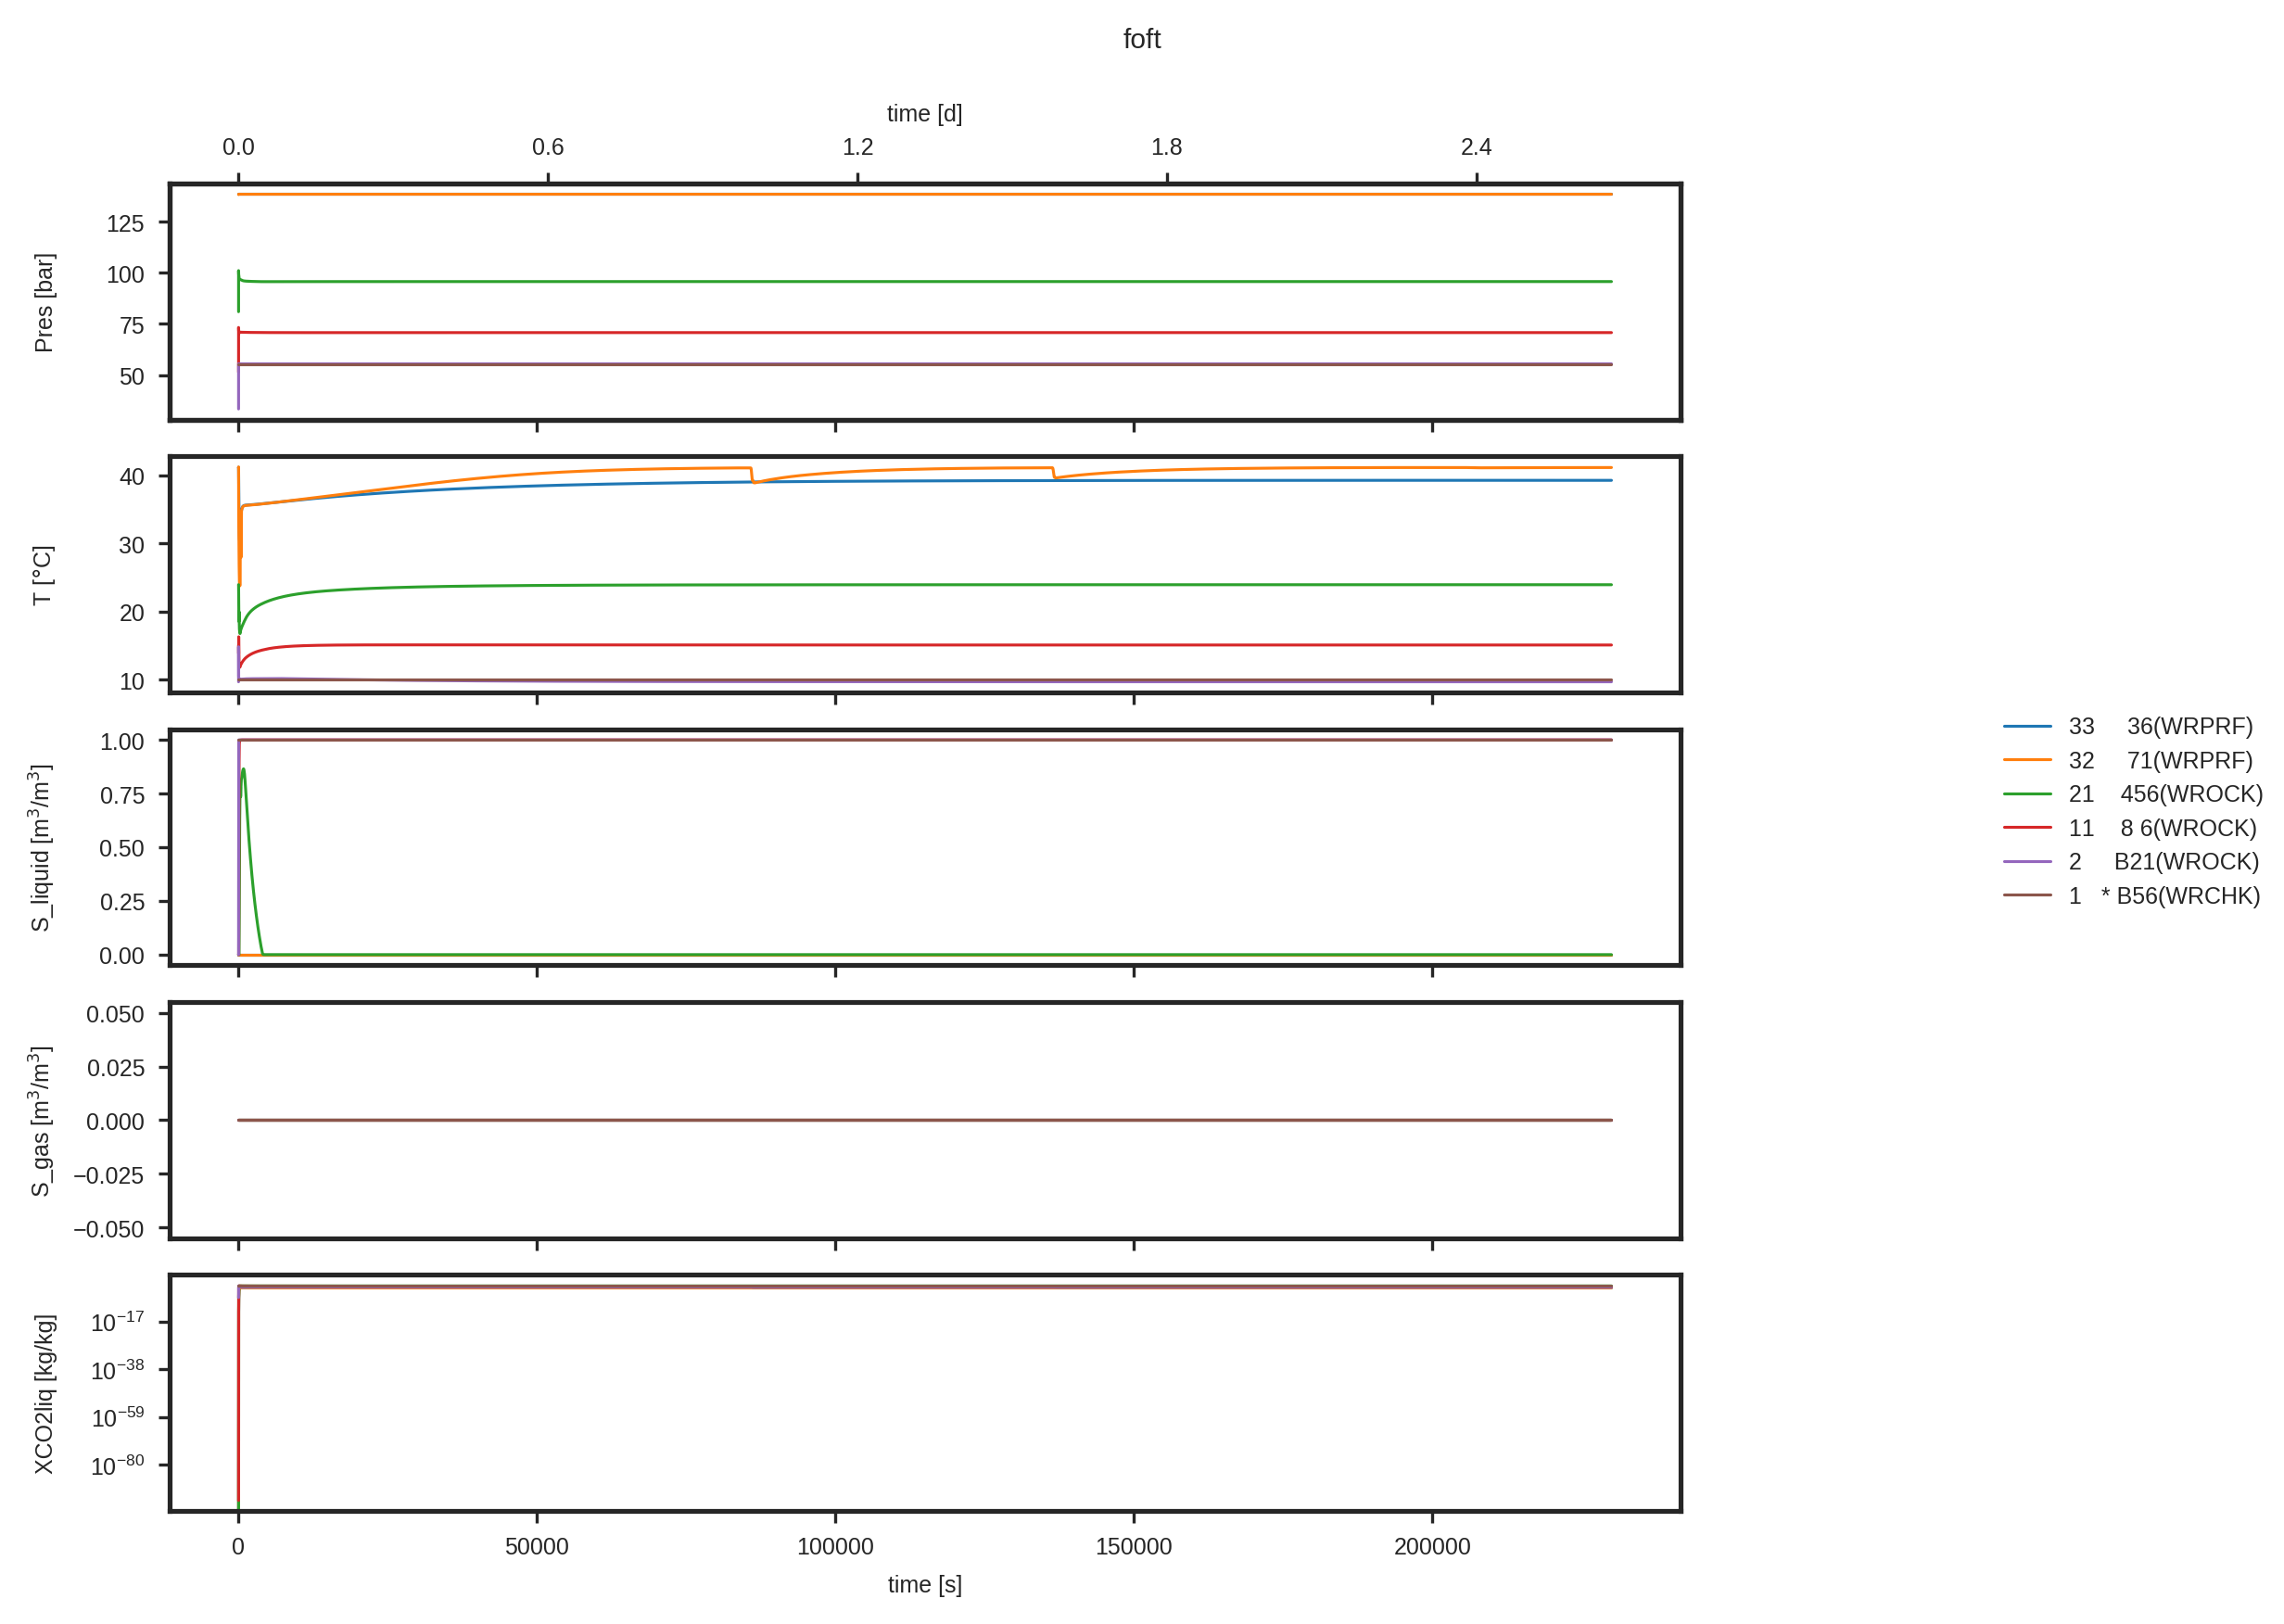

In [ ]:


def plot_OFT(title, df, items, df_vars, logscale, mesh_eleme, mesh_conne):
    w = 6
    h = (2.8-1)*len(df_vars)
    
    w = 8.1
    h = 5.85
    rcParams['figure.figsize'] = [w,h]

    mesh_eleme_v2 = mesh_eleme.copy()
    mesh_eleme_v2 = mesh_eleme_v2.set_index(('ElName'))


    fig, axs = plt.subplots(len(df_vars),1, sharex=True)

    for var_idx, var in enumerate(df_vars):

        print(var_idx, var)


        if len(df_vars)>1:
            ax = axs[var_idx]
        else:
            ax = axs

        for item in items:
            print('plot item {:d} in {:s} plot'.format(item,var))

            if title =='coft':
   
                el1 = mesh_conne.loc[item, 'EL1']
                el2 = mesh_conne.loc[item, 'EL2']
                k_dir = mesh_conne.loc[item, 'ISOT']

                mat1 = mesh_eleme_v2.loc[el1,'MAT']
                mat2 = mesh_eleme_v2.loc[el2,'MAT']
                item_label =  '{:s}>{:s}({:s} to {:s} in {:s} dir.)'.format(el1,el2,mat1, mat2, perm_dict[k_dir])



            elif title =='foft':
                print('item is',item)
                el = mesh_eleme.loc[item,'ElName']
                print(el)
                mat = mesh_eleme.loc[item,'MAT']
                item_label = '{:<4d}{:s}({:s})'.format(item,el,mat)
            df.plot(x='time', y=(item, var), ax=ax, label=item_label, legend = False)
            # df.plot(x='time', y=(item, var), ax=ax, label='tt', legend = False)

        ##TEST
        #ax.set_xlim(left=-1, right=30*60)
        ##TEST

        if var == df_vars[-1]:
            ax.set_xlabel('time [s]')

        if var == df_vars[0]:
            secondary_scale(logscale, ax)
        

        
        
        ax.set_ylabel('{:s} [{:s}]'.format(var, units_dict[var]))
        
    if title == 'foft':
        ax.set_yscale('log')

    fig.suptitle(title)
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='center right')
    fig.align_ylabels()
    fig.tight_layout(rect=[0,0,0.75,0.98])

plot_OFT('foft', foft, foft_idx, foft_var, logscale=False, mesh_eleme=eleme, mesh_conne=conne)

In [ ]:
eleme

,ElName,NSEQ,NADD,MAT,VOLX,AHTX,PMX,X,Y,Z
1,* B56,,,WRCHK,3.801330e+53,0.0,1.0,0.05500,-312.500,-312.500
2,B21,,,WROCK,7.602654e-01,0.0,1.0,0.05500,-323.000,-323.000
3,A86,,,WROCK,7.602654e-01,0.0,1.0,0.05500,-343.000,-343.000
4,A51,,,WROCK,7.602654e-01,0.0,1.0,0.05500,-363.000,-363.000
5,A16,,,WROCK,7.602654e-01,0.0,1.0,0.05500,-383.000,-383.000
...,...,...,...,...,...,...,...,...,...,...
132,1 1,,,CAPRK,3.333260e+54,0.0,1.0,1283.08975,-1217.125,-1217.125
133,1 2,,,CAPRK,4.163060e+54,0.0,1.0,1456.74733,-1217.125,-1217.125
134,1 3,,,CAPRK,5.180190e+54,0.0,1.0,1647.78144,-1217.125,-1217.125
135,1 4,,,CAPRK,6.389360e+54,0.0,1.0,1857.34961,-1217.125,-1217.125


In [ ]:
fnames_map

{'coft': 'COFT_test_55bar10C',
 'fstatus': 'fstatus_test_55bar10C_ 1',
 'fflow': 'fflow_test_55bar10C_ 1',
 'foft': 'FOFT_test_55bar10C'}

In [ ]:
ip_file = fnames_map['fflow']


var, df = read_FFlow(ip_file, EOS)

var

Processing fflow_test_55bar10C_ 1 file


['Dis',
 'cumDepth',
 'q_aqueous',
 'q_liquid',
 'q_gas',
 'V_aqueous',
 'V_liquid',
 'V_gas',
 'V_mix']

In [13]:
coft

,1,2,3,4,5,6,7,8,9,10,11
0,,,,,,,,,,,
1,1.000000e-03,1,0.0,0.0,0.000000,0.000000,68,0.0,0.0,-4.574704e-15,-4.574704e-15
2,2.309000e-03,1,0.0,0.0,0.000033,0.000033,68,0.0,0.0,-1.372411e-14,-1.372411e-14
3,4.022481e-03,1,0.0,0.0,0.000077,0.000077,68,0.0,0.0,-2.287352e-14,-2.287352e-14
4,6.265428e-03,1,0.0,0.0,0.000134,0.000134,68,0.0,0.0,-3.659763e-14,-3.659763e-14
5,9.201445e-03,1,0.0,0.0,0.000209,0.000209,68,0.0,0.0,-5.032175e-14,-5.032175e-14
...,...,...,...,...,...,...,...,...,...,...,...
95,5.593914e+06,1,0.0,0.0,1.000000,1.000000,68,0.0,0.0,9.999973e-01,9.999973e-01
96,6.593914e+06,1,0.0,0.0,1.000000,1.000000,68,0.0,0.0,9.999978e-01,9.999978e-01
97,7.593914e+06,1,0.0,0.0,1.000000,1.000000,68,0.0,0.0,9.999981e-01,9.999981e-01


In [6]:
fnames_map['fstatus']

'fstatus_Injection_1km_5bar_1kg_ 1'

In [8]:
ip_file = r'fstatus_Injection_1km_5bar_1kg_ 1'

with open(ip_file) as fs:
    next(fs)
    fs_header = next(fs)

fs_header = fs_header.split('=')[1]
fs_header = fs_header.split(",")
fs_header

fstatus = pd.read_csv(ip_file, skiprows=3, names=fs_header)
fstatus = fstatus.apply(pd.to_numeric, errors='coerce')
fstatus = fstatus.fillna(0)

fstatus

,WellID,Time(s),Dis(m),cumDepth(m),S_aqueous,S_liquid,S_gas,XCO2liq(kg/kg),Pres(Pa),T(<sup<o</sup>C),D_aqueous(kg/m<sup>3</sup>),D_liquid(kg/m<sup>3</sup>),D_gas(kg/m<sup>3</sup>)\n
0,1,0.001,0.0,0.0,0.0,0.0,1.0,0.0,2.500000e+06,5.000000,1000.796030,895.021800,58.152394
1,1,0.001,25.0,-25.0,0.0,0.0,1.0,0.0,4.163259e+05,5.625000,1000.100953,890.867240,8.128557
2,1,0.001,75.0,-100.0,0.0,0.0,1.0,0.0,4.203215e+05,6.875000,1000.070908,882.424495,8.169152
3,1,0.001,125.0,-150.0,0.0,0.0,1.0,0.0,4.243370e+05,8.125000,1000.016427,873.737205,8.209707
4,1,0.001,175.0,-200.0,0.0,0.0,1.0,0.0,4.283724e+05,9.375000,999.938452,864.768155,8.250268
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,1,8640000.000,825.0,-850.0,0.0,0.0,1.0,0.0,8.175748e+05,22.373951,998.043830,746.040436,15.320247
1448,1,8640000.000,875.0,-900.0,0.0,0.0,1.0,0.0,8.250144e+05,23.739750,997.722149,728.715675,15.384157
1449,1,8640000.000,925.0,-950.0,0.0,0.0,1.0,0.0,8.324861e+05,25.082583,997.387726,709.960078,15.449203
1450,1,8640000.000,975.0,-1000.0,0.0,0.0,1.0,0.0,8.399988e+05,26.376278,997.049050,689.372108,15.517313


In [ ]:
read_FStatus(ip_file)

In [11]:
def read_FStatus(ip_file):

    """
    Function to parse FStatus file.
    It creates a pandas dataframe
    """
    print('Processing {:s} file'.format(ip_file))

    with open(ip_file) as fs:
        next(fs)
        fs_header = next(fs)
    
    fs_header = fs_header.split('=')[1]
    fs_header = fs_header.split()

    fstatus = pd.read_csv(ip_file, skiprows=3, names=fs_header)
    fstatus = fstatus.apply(pd.to_numeric, errors='coerce')
    fstatus = fstatus.fillna(0)
    fstatus['Pres']/= 1e5


    return fs_header[2:], fstatus

In [7]:
read

,ElName,NSEQ,NADD,MAT,VOLX,AHTX,PMX,X,Y,Z
1,*bA 1,,,wella,1.000000e+52,NaN,NaN,0.000,0.0,0.0
2,1AA 1,,,wellb,1.909300e+00,0.0,0.0,0.000,0.0,-25.0
3,1BA 1,,,wellb,1.909300e+00,0.0,0.0,0.000,0.0,-75.0
4,1CA 1,,,wellb,1.909300e+00,0.0,0.0,0.000,0.0,-125.0
5,1DA 1,,,wellb,1.909300e+00,0.0,0.0,0.000,0.0,-175.0
...,...,...,...,...,...,...,...,...,...,...
65,02A92,,,sand1,1.284300e+07,0.0,0.0,475.387,0.0,-1025.0
66,02A93,,,sand1,1.847900e+07,0.0,0.0,569.983,0.0,-1025.0
67,02A94,,,sand1,2.659100e+07,0.0,0.0,683.498,0.0,-1025.0
68,02A95,,,sand1,3.826800e+07,0.0,0.0,819.716,0.0,-1025.0


In [3]:
test = ['plot_T2output.py', 'sample_files/sample_T2Well_ECO2M/Injection_1km_5bar_1kg.inp', 'fstatus']
plot_specs(test, plot_bool, fnames)

file queried: ['fstatus']
items queried: None
asdasd ['fflow_Injection_1km_5bar_1kg_ 1', 'fstatus_Injection_1km_5bar_1kg_ 1', 'COFT_Injection_1km_5bar_1kg', 'FOFT_Injection_1km_5bar_1kg']


({'fflow_Injection_1km_5bar_1kg_ 1': False,
  'fstatus_Injection_1km_5bar_1kg_ 1': False,
  'COFT_Injection_1km_5bar_1kg': False,
  'FOFT_Injection_1km_5bar_1kg': False},
 {})

In [10]:
plot_bool.keys()

dict_keys(['fflow_Injection_1km_5bar_1kg_ 1', 'fstatus_Injection_1km_5bar_1kg_ 1', 'COFT_Injection_1km_5bar_1kg', 'FOFT_Injection_1km_5bar_1kg'])

In [6]:
any(item.startswith('fstatus') for item in fnames)

True

In [ ]:
path = 'sample_files/sample_T2Well_ECO2M/'
os.chdir(path)





os.chdir(old_path)

In [2]:



ip_file = 'case2.inp'

raw_names = [r'FFlow', r'FStatus', r'COFT', r'FOFT']
fnames = []
op_files = []
plot_bool = dict()

for f in os.listdir(os.getcwd()):
    if f in raw_names:
        f_size = os.path.getsize(f)
        if f_size>0:
            fnames.append(f)
            op_files.append(f)
            plot_bool[f] = True


ffunc = []


parse_dict = dict()

for file in fnames:
    if file=='FFlow':
        parse_dict[file]=read_FFlow
    elif file=='FStatus':
        parse_dict[file]=read_FStatus
    elif file=='COFT':
        parse_dict[file]=read_COFT
    elif file=='FOFT':
        parse_dict[file]=read_FOFT

plot_dict = dict()



In [5]:
os.chdir('/')


PATH_ECO2N = r'/workspaces/T2Well_post/sample_files/sample_T2Well_ECO2N'
PATH_ECO2M = r'/workspaces/T2Well_post/sample_files/sample_T2Well_ECO2M'


In [6]:
os.listdir(PATH_ECO2M)

['fflow_Injection_1km_5bar_1kg_ 1',
 'INCON',
 'SAVE',
 'LINEQ',
 'fstatus_Injection_1km_5bar_1kg_ 1',
 'xyzrock.mesh',
 'WHConds_Injection_1km_5bar_1kg.txt',
 'COFT_Injection_1km_5bar_1kg',
 'CO2TAB',
 'Inj.out',
 'VERS',
 'TABLE',
 'Injection_1km_5bar_1kg.inp',
 'FOFT_Injection_1km_5bar_1kg',
 'MESH',
 'DOFT',
 'GENER']

In [12]:
raw_names = tuple([r'fflow', r'fstatus', r'coft', r'foft'])

plot_bool = dict()

for f in os.listdir(PATH_ECO2M):
    if f.lower().startswith(raw_names):
        plot_bool[f] = True

plot_bool

{'fflow_Injection_1km_5bar_1kg_ 1': True,
 'fstatus_Injection_1km_5bar_1kg_ 1': True,
 'COFT_Injection_1km_5bar_1kg': True,
 'FOFT_Injection_1km_5bar_1kg': True}

Bad pipe message: %s [b'\x8b\x13A:\x85\xdct\x91\x81\xe2\xea\xad\x15\xaf\x90`q\xc1 \xd9C\xd3\x17\xf9\xd0\xf7\xb4\xa4\x94g[', b'\xa6\xa8-\xc2\xe31\x13\xdc,\x01\xf6\xb1"\x916\xd00s\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.', b'0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00\x1c\x04\x03']
Bad pipe message: %s [b'\x06\x03\x08\x07', b'\x08\t\x08\n\x08\x0b\x08']
Bad pipe message: %s [b'\x05\x08\x06']
Bad pipe message: %s [b'\x05\x01\x06', b'']
Bad pipe message: %s [b'\x03\x02\x03\x04\x00-\x00\x02\x01\x01\x003\x00&\x00$\x00\x1d\x00 \x8dq\xb1\xa5\n\xd0.\xd5[W\x1d\x03:j^\x86\x91\xf0\xfe\xe7j\x87']
Bad pipe message: %s [b"y;\xdc905\xe2\x05\xc1P\xd6\xe7\xc5\x16P\x8a'\xa2\x00\x00|\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W\xc0S\xc0+\xc0/\x00\xa2\x00\x9e\xc0\xae\xc0\xac\xc0\xa2\xc0\x9e\

In [13]:
os.getcwd()

'/'

In [14]:
os.listdir(PATH_ECO2N)

['case2.out',
 'INCON',
 'COFT',
 'SAVE',
 'LINEQ',
 'CO2TAB',
 'Thumbs.db',
 'FOFT',
 'VERS',
 'TABLE',
 'MESH',
 'DOFT',
 'FFlow',
 'GENER',
 'FStatus',
 'case2.inp']

In [15]:
os.chdir(PATH_ECO2N)

In [19]:
os.listdir(os.path.dirname('case2.inp'))



FileNotFoundError: [Errno 2] No such file or directory: ''

In [6]:
fstatus_var, fstatus_df = read_FStatus('FStatus')
fflow_var, fflow_df = read_FFlow('FFlow')



Processing FStatus file
Processing FFlow file


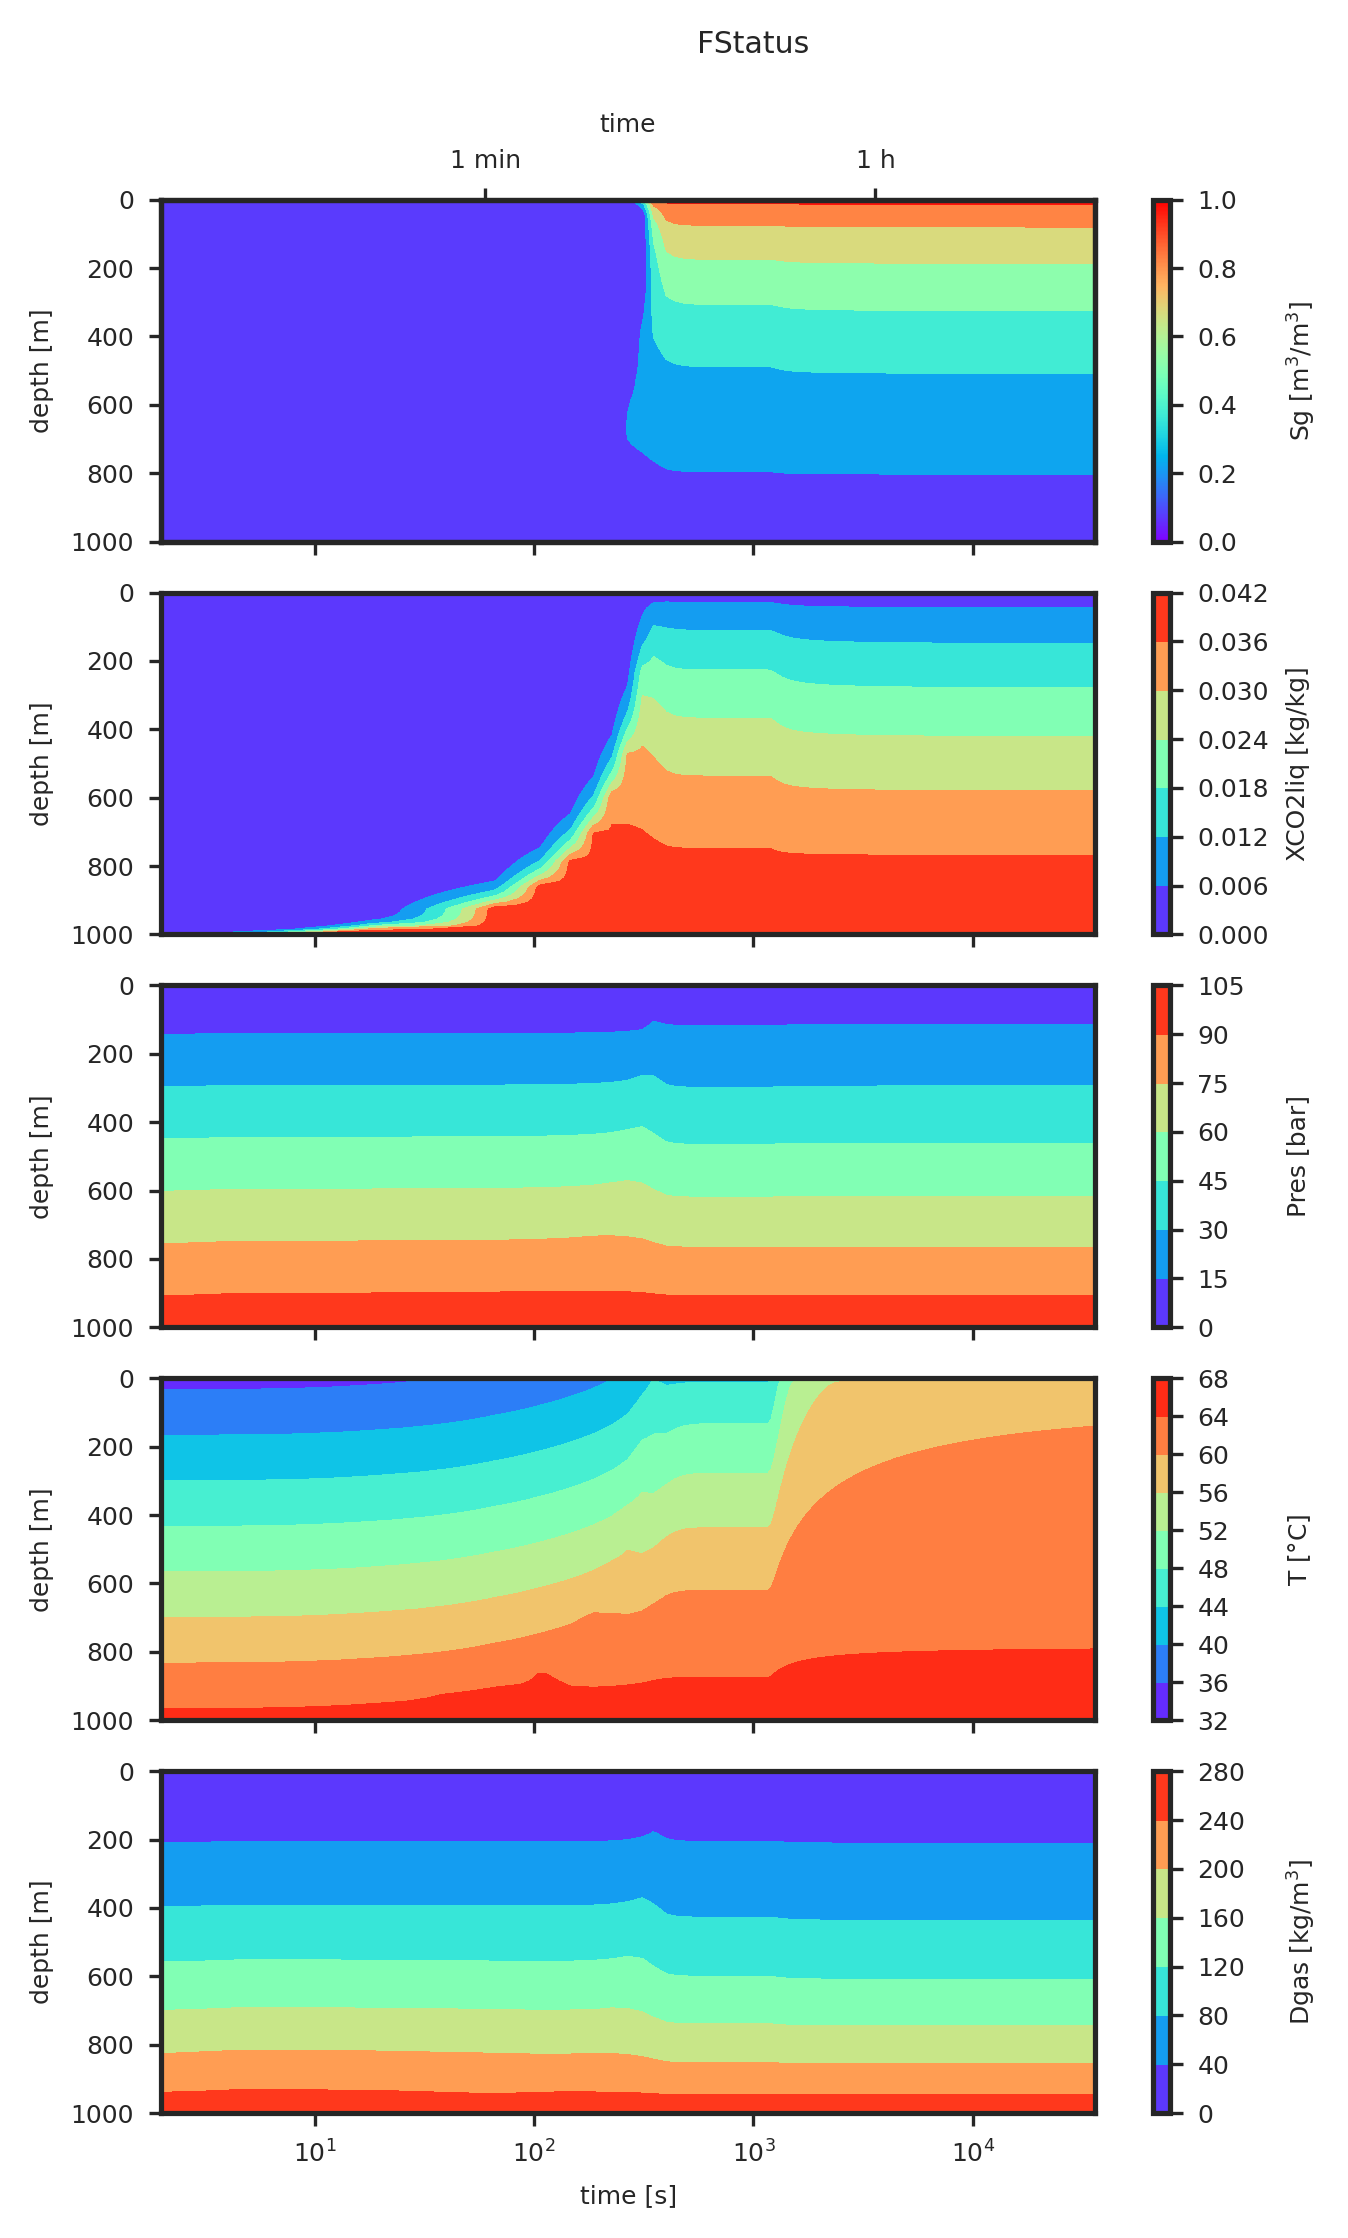

In [7]:
logscale = True

plot_Ffigure('FStatus', fstatus_df, fstatus_var, logscale)

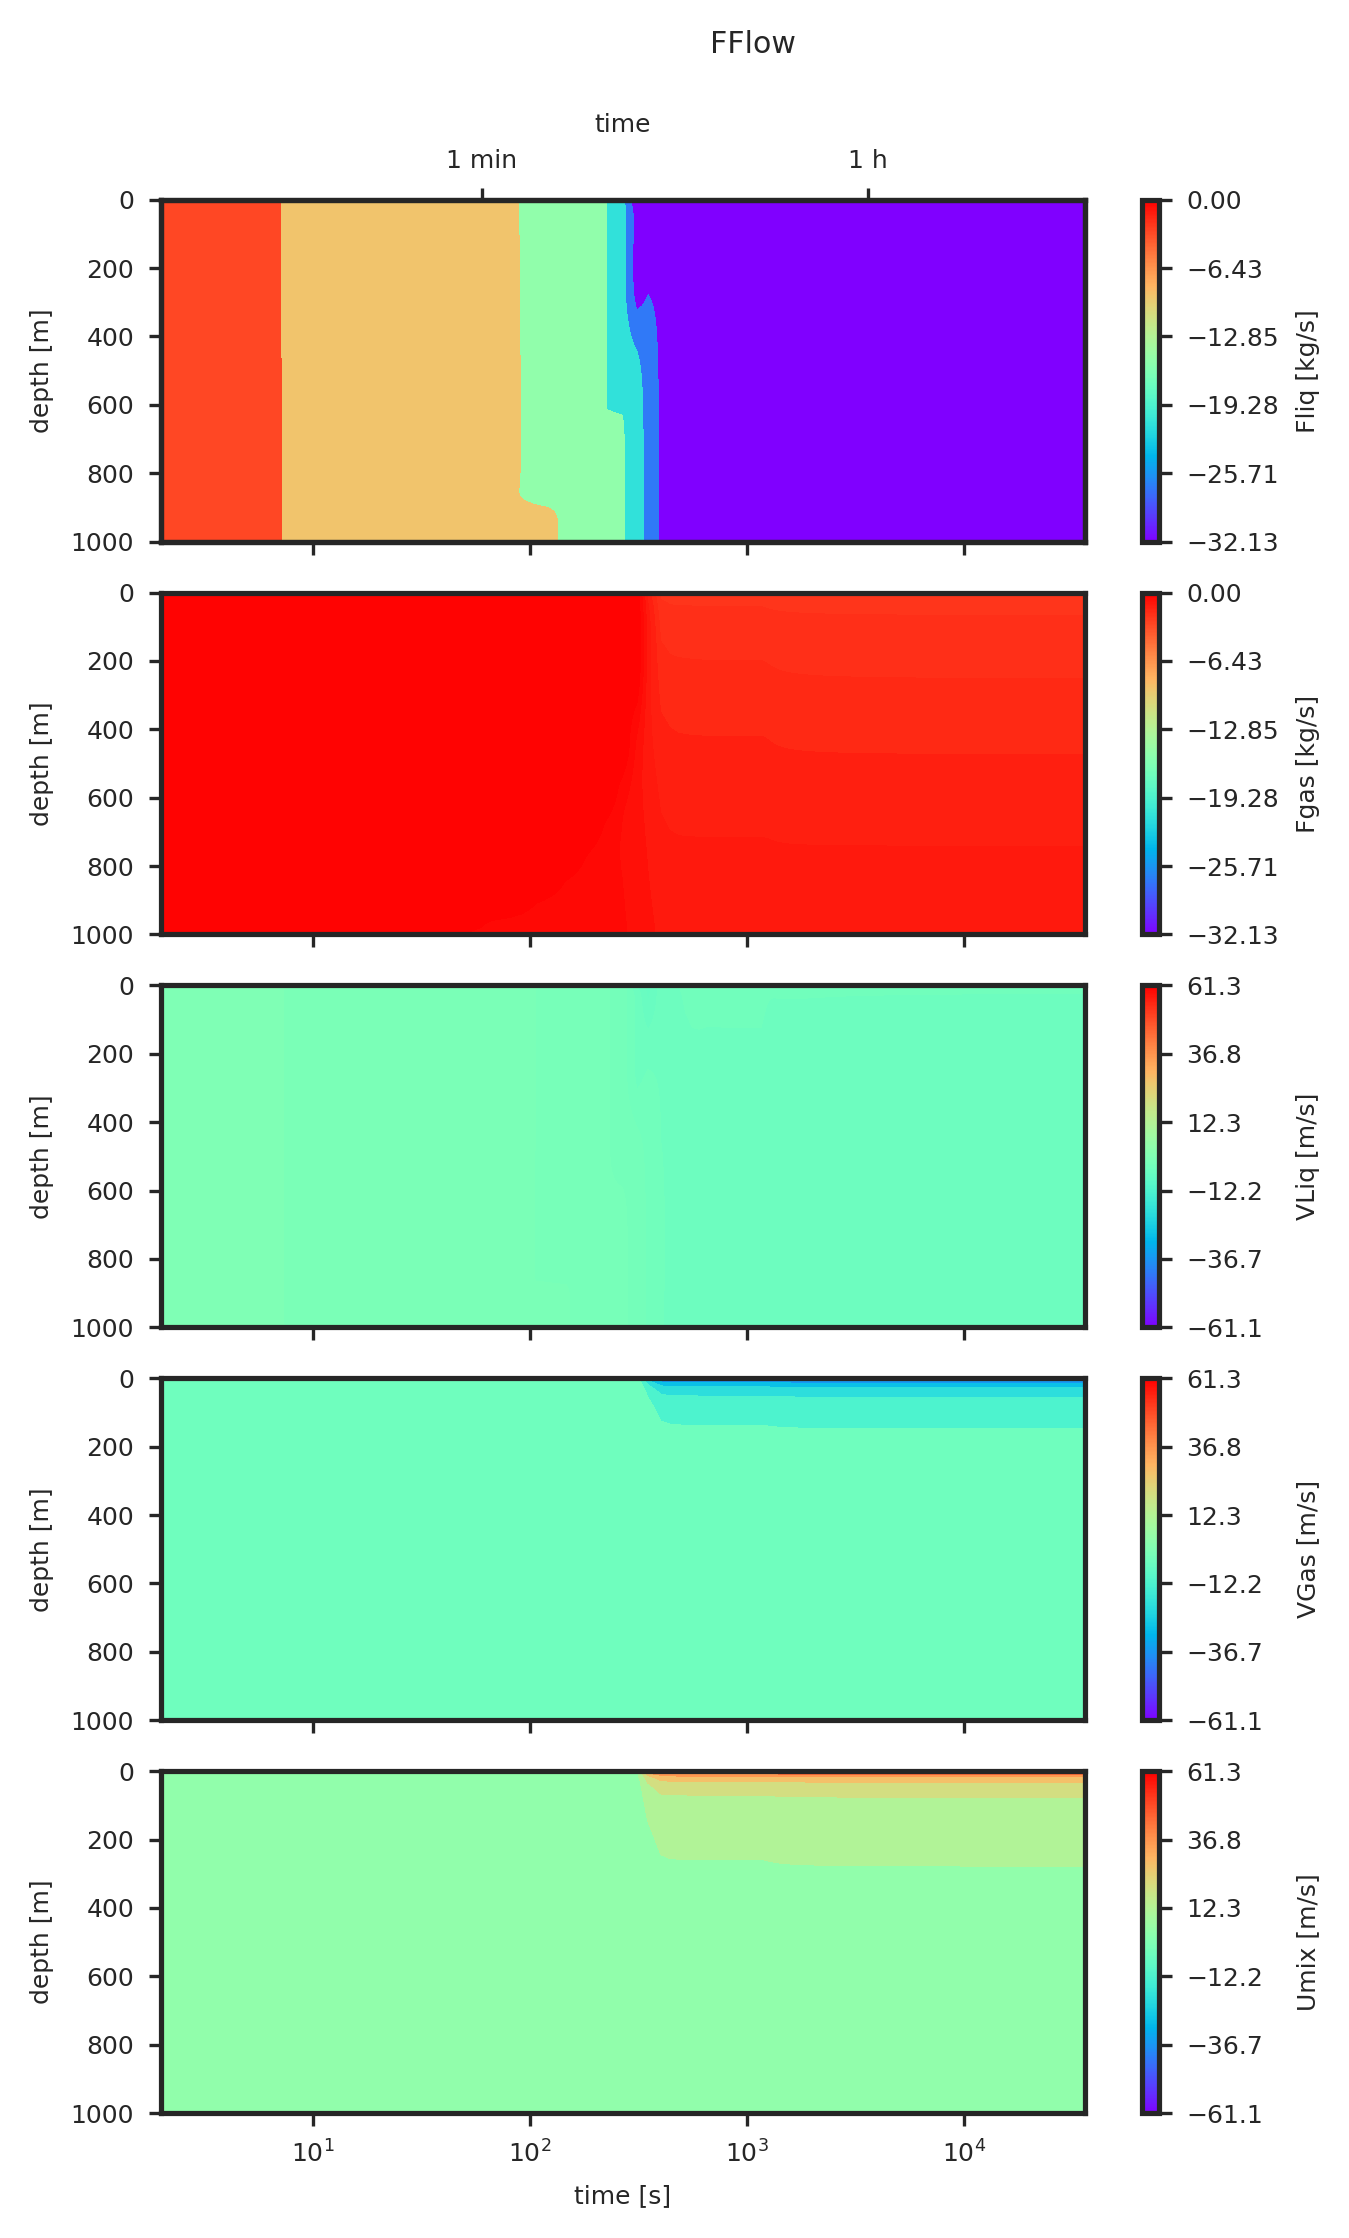

In [8]:
logscale = True

plot_Ffigure('FFlow', fflow_df, fflow_var, logscale)